In [1]:
%pip install -U pip setuptools wheel
%pip install -U spacy
%pip install spacy_fastlang
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------  12.6/12.8 MB 88.0 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 50.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


c:\Users\Shaggy\AppData\Local\Programs\Python\Python310\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Shaggy\AppData\Local\Programs\Python\Python310\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Shaggy\AppData\Local\Programs\Python\Python310\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Shaggy\AppData\Local\Programs\Python\Python310\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [53]:
biden_chunks = pd.read_csv("E:\Magister\hashtag_joebiden.csv", usecols=["tweet_id", "tweet", "user_id", "user_name", "user_screen_name", "user_description", "user_join_date", "user_followers_count", "user_location", "country", "collected_at"], engine='python')
trump_chunks = pd.read_csv("E:\Magister\hashtag_donaldtrump.csv", usecols=["tweet_id", "tweet", "user_id", "user_name", "user_screen_name", "user_description", "user_join_date", "user_followers_count", "user_location", "country", "collected_at"], engine='python')

In [4]:
biden_chunks.head(5)

,tweet_id,tweet,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,country,collected_at
0,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",United States of America,2020-10-21 00:00:00
1,1.31652929585929e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",2012-09-08 01:03:57,6628.0,NaN,NaN,2020-10-21 00:00:00.517827283
2,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,United States of America,2020-10-21 00:00:01.035654566
3,1.3165293080815575e+18,@chrislongview Watching and setting dvr. Let’s...,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,2017-01-25 14:16:17,27.0,NaN,NaN,2020-10-21 00:00:01.553481849
4,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",United States of America,2020-10-21 00:00:02.071309132


In [2]:
def is_float(var):
  try:
    float(var)
    return var
  except ValueError:
    return None

In [56]:
biden_chunks.dropna(subset=['user_id'], inplace=True)
trump_chunks.dropna(subset=['user_id'], inplace=True)

In [57]:
biden_chunks['user_id'] = biden_chunks['user_id'].apply(lambda x: is_float(x))

In [58]:
trump_chunks['user_id'] = trump_chunks['user_id'].apply(lambda x: is_float(x))

In [59]:
biden_chunks.dropna(subset=['user_id'], inplace=True)
trump_chunks.dropna(subset=['user_id'], inplace=True)

In [12]:
import spacy
import spacy_fastlang
import re

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("language_detector")

c:\Users\Shaggy\AppData\Local\Programs\Python\Python310\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Shaggy\AppData\Local\Programs\Python\Python310\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Shaggy\AppData\Local\Programs\Python\Python310\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Shaggy\AppData\Local\Programs\Python\Python310\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [17]:
def is_eng(tweet):
        try:
                doc = nlp(tweet)
                return doc._.language == 'en'
        except:
                return False

def process_data(chunk):       
        chunk['tweet'] = chunk['tweet'].apply(lambda x: re.split('https::\/\/.*', str(x))[0])
        chunk['tweet'] = chunk['tweet'].apply(lambda x: re.split(r'#[\S]+', str(x))[0])
        chunk['tweet'] = chunk['tweet'].apply(lambda x: re.split(r'@[\S]+', str(x))[0])
        chunk['tweet'] = chunk['tweet'].apply(lambda x: re.split(r'[^\w\s]', str(x))[0])
        
        emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                "]+", flags=re.UNICODE)

        chunk['tweet'] = chunk['tweet'].apply(lambda x: re.split(emoji_pattern, str(x))[0])
        
        chunk['tweet'] = chunk['tweet'].str.lower()
        chunk = chunk[chunk['tweet'].apply(lambda x: len(x) > 15)]
        chunk['tweet'].dropna(inplace=True)
        chunk.reset_index(inplace=True)
        return chunk

In [62]:
mask = biden_chunks['tweet'].apply(lambda x: is_eng(x))

eng = biden_chunks[mask]

eng.reset_index(inplace=True)

eng.head(n=10)

,index,tweet_id,tweet,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,country,collected_at
0,1,1.31652929585929e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,809904438.0,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",2012-09-08 01:03:57,6628.0,NaN,NaN,2020-10-21 00:00:00.517827283
1,2,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,3494182277.0,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,United States of America,2020-10-21 00:00:01.035654566
2,3,1.3165293080815575e+18,@chrislongview Watching and setting dvr. Let’s...,8.242596012018524e+17,Michelle Ferg,MichelleFerg4,NaN,2017-01-25 14:16:17,27.0,NaN,NaN,2020-10-21 00:00:01.553481849
3,4,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.032806955356545e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",United States of America,2020-10-21 00:00:02.071309132
4,5,1.3165293165079306e+18,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",305727891.0,Dose of Dissonance,Dose_Dissonance,YOUTUBE CHANNEL: https://t.co/EFnKm5gnvV MERCH...,2011-05-26 18:09:32,4622.0,NaN,NaN,2020-10-21 00:00:02.589136415
5,6,1.3165293244182405e+18,"In 2020, #NYPost is being #censorship #CENSORE...",19940334.0,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",2009-02-02 23:08:28,1397.0,"Chicago, Illinois",United States of America,2020-10-21 00:00:03.106963698
6,7,1.3165293476086784e+18,►► Tell Politicians to STICK IT with this FREE...,103083214.0,🆓 Freebie Depot,FreebieDepot,Free Stuff - No Fluff! Get all kinds of FREE ...,2010-01-08 20:44:21,6402.0,USA - Land of the FREE!,NaN,2020-10-21 00:00:03.624790981
7,8,1.3165293692009513e+18,#Biden https://t.co/qMs0PmUev5,1.2725683675059487e+18,Kenneth,Kennethuteliv,NaN,2020-06-15 16:35:31,103.0,NaN,NaN,2020-10-21 00:00:04.142618264
8,9,1.3165293928273428e+18,Proof Bidens are crooked. Twitter will suspen...,1.2756585327848325e+18,Jake Rivendale,JakeRivendale,NaN,2020-06-24 05:15:06,80.0,NaN,NaN,2020-10-21 00:00:04.660445547
9,10,1.3165294056284815e+18,Now Open! Create a FREE U.S. Election Pick'em ...,21932049.0,OfficePools.com,officepools_com,Visit https://t.co/CdmWfqRMIS to play now! #fa...,2009-02-25 22:52:43,967.0,NaN,NaN,2020-10-21 00:00:05.178272830


In [63]:
eng.to_csv("test.csv")

In [64]:
mask_trump = trump_chunks['tweet'].apply(lambda x: is_eng(x))

eng_t = trump_chunks[mask_trump]

eng_t.reset_index(inplace=True)

eng_t.head(n=10)

,index,tweet_id,tweet,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,country,collected_at
0,1,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,2020-10-21 00:00:00.373216530
1,2,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,United States of America,2020-10-21 00:00:00.746433060
2,3,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,2020-10-21 00:00:01.119649591
3,4,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump ‘s ra...,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,United States of America,2020-10-21 00:00:01.492866121
4,5,1.316529291052675e+18,@CLady62 Her 15 minutes were over long time ag...,1138416104.0,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,2013-02-01 01:37:38,2363.0,"Perris,California",United States of America,2020-10-21 00:00:01.866082651
5,6,1.316529289949569e+18,@richardmarx Glad u got out of the house! DICK...,7.674018410302095e+17,Michael Wilson,wilsonfire9,NaN,2016-08-21 16:43:51,75.0,"Powell, TN",NaN,2020-10-21 00:00:02.239299182
6,7,1.3165292934979625e+18,@DeeviousDenise @realDonaldTrump @nypost There...,9.007610716314296e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two...",2017-08-24 16:45:49,766.0,"Ohio, USA",United States of America,2020-10-21 00:00:02.612515712
7,8,1.3165293013329183e+18,One of the single most effective remedies to e...,540476889.0,Jamieo,jamieo33,"Don't know what I am. Can lean left and right,...",2012-03-30 00:30:54,151.0,"Pennsylvania, USA",United States of America,2020-10-21 00:00:02.985732243
8,9,1.3165293085763092e+18,#Election2020 #Trump \n#FreedomOfSpeech https:...,1.305532976998969e+18,Johnny Quest,JohnnyQuest22,Independent\n\nWhat is your American Dream?\nT...,2020-09-14 15:45:18,8.0,NaN,NaN,2020-10-21 00:00:03.358948773
9,10,1.3165293165079306e+18,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",305727891.0,Dose of Dissonance,Dose_Dissonance,YOUTUBE CHANNEL: https://t.co/EFnKm5gnvV MERCH...,2011-05-26 18:09:32,4622.0,NaN,NaN,2020-10-21 00:00:03.732165303


In [65]:
eng_t.to_csv("test_trump.csv")

In [8]:
BIDEN_EN = pd.read_csv("E:\Magister\\test_biden.csv", engine='python')
TRUMP_EN = pd.read_csv("E:\Magister\\test_trump.csv", engine='python')

In [18]:
BIDEN_CLEAN = process_data(BIDEN_EN)

C:\Users\Shaggy\AppData\Local\Temp\ipykernel_16704\1178084255.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.dropna(inplace=True)


In [19]:
TRUMP_CLEAN = process_data(TRUMP_EN)

C:\Users\Shaggy\AppData\Local\Temp\ipykernel_16704\1178084255.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.dropna(inplace=True)


In [23]:
BIDEN_CLEAN.to_csv("BIDEN_CLEAN.csv")
TRUMP_CLEAN.to_csv("TRUMP_CLEAN.csv")

In [24]:
nlp.disable_pipe("language_detector")

In [41]:
BIDEN_CLEAN = pd.read_csv("BIDEN_CLEAN.csv")
TRUMP_CLEAN = pd.read_csv("TRUMP_CLEAN.csv")

In [42]:
def del_stop_lemma(sentence):
    doc = nlp(sentence)
    tweet = [token.lemma_ for token in doc if not token.is_stop]
    if len(tweet) > 2:
        return [token.lemma_ for token in doc if not token.is_stop]
    else:
        return None

BIDEN_CLEAN['tweet'] = BIDEN_CLEAN['tweet'].apply(lambda x: del_stop_lemma(x))

BIDEN_CLEAN.head(10)

,Unnamed: 0.1,level_0,Unnamed: 0,index,tweet_id,tweet,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,country,collected_at
0,0,10,10,11,1.316529e+18,"[fbi, allegedly, obtain, hunter, biden, computer]",9.607387e+17,RLCompton,NewfoundStudio,"""There are things known and there are things u...",2018-02-06 04:55:35,266.0,"Kentucky, USA",United States of America,2020-10-21 00:00:05.696100113
1,1,16,16,17,1.316530e+18,None,1.016593e+08,John Ubaldi,ubaldireports,Just Facts... No Fiction on domestic and globa...,2010-01-04 04:34:39,83.0,"Tampa, Florida",United States of America,2020-10-21 00:00:08.803063811
2,2,20,20,21,1.316530e+18,"[effort, find, truth, allegation]",1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30,954.0,"Champaign, IL",United States of America,2020-10-21 00:00:10.874372943
3,3,35,35,36,1.316530e+18,None,8.957270e+17,John MacDonald for the People,jmac4thepeople,"Father, veteran, veteran's advocate, former ca...",2017-08-10 19:22:18,1253.0,"Lowell, MA",United States of America,2020-10-21 00:00:19.159609471
4,4,40,40,41,1.316530e+18,None,5.667098e+07,malcolm cowing,MalcolmCowing,Retired former Managing Partner of marcoms age...,2009-07-14 11:36:31,1349.0,"Yorkshire, England",United States of America,2020-10-21 00:00:21.748745887
5,5,45,45,46,1.316530e+18,"[hunter, biden, email, demonstrate, crooked, b...",3.045878e+08,Mames,Mame2go,"Drats,Drats & Double Drats! Love Ya, Mean it!",2011-05-24 19:28:46,45.0,Florida,United States of America,2020-10-21 00:00:24.855709585
6,6,52,52,53,1.316530e+18,"[night, meet, cast]",5.581804e+08,🦩 Hannah for Biden/Harris🦩,CarlsonHannahM,Band Director • BME Furman University • MM x2 ...,2012-04-20 00:28:01,133.0,"Indianapolis, IN",United States of America,2020-10-21 00:00:28.998327849
7,7,70,70,71,1.316530e+18,"[reason, twitter, lock, new, york, post, accou...",3.112087e+09,Complete Christianity,ShaneSchaetzel,"Catholic Convert & Apologist, Catechist, Autho...",2015-03-28 03:51:53,687.0,The Ozarks,United States of America,2020-10-21 00:00:38.319218943
8,8,72,72,73,1.316530e+18,"[powerful, actor, try, twist, arm, americans, ...",9.236118e+07,Harry J. Bentham,hjbentham,Independent author via @amazon and former colu...,2009-11-24 20:45:34,1049.0,United Kingdom,United Kingdom,2020-10-21 00:00:39.354873509
9,9,74,74,75,1.316530e+18,"[laptop, computer, abandon, delaware, repair, ...",9.114597e+07,H L Wegley,hlwegley,Meteorologist & Comp Sci guy who writes novels...,2009-11-19 17:13:18,3313.0,Seattle area,United States of America,2020-10-21 00:00:40.390528075


In [43]:
TRUMP_CLEAN['tweet'] = TRUMP_CLEAN['tweet'].apply(lambda x: del_stop_lemma(x))

TRUMP_CLEAN['tweet'].head()

0        [single, effective, remedy, eradicate, round]
1                                                 None
2    [ice, cube, team, work, president, trump, deve...
3                                                 None
4                                                 None
Name: tweet, dtype: object

In [44]:
TRUMP_CLEAN.dropna(inplace=True, subset=["tweet"])
BIDEN_CLEAN.dropna(inplace=True, subset=["tweet"])

In [9]:
TRUMP_CLEAN.to_csv("TRUMP_FINAL.csv")
BIDEN_CLEAN.to_csv("BIDEN_FINAL.csv")

In [30]:
TRUMP_CLEAN = pd.read_csv("TRUMP_FINAL.csv")
BIDEN_CLEAN = pd.read_csv("BIDEN_FINAL.csv")

In [47]:
fullset = pd.concat([TRUMP_CLEAN['tweet'], BIDEN_CLEAN['tweet']])

In [31]:
TRUMP_CONCAT = TRUMP_CLEAN.dropna(subset=['tweet'])

In [32]:
BIDEN_CONCAT = BIDEN_CLEAN.dropna(subset=['tweet'])

In [33]:
tweets = pd.concat([TRUMP_CONCAT, BIDEN_CONCAT])

In [34]:
tweets = tweets.sample(frac=1)
tweets.reset_index(inplace=True, drop=True)

In [48]:
fullset = fullset.sample(frac=1)
fullset.reset_index(inplace=True, drop=True)

Gensim Version: Full BoW LDA implementation

In [85]:
%pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------- ----------------- 13.4/24.0 MB 76.2 MB/s eta 0:00:01
   ---------------------------------------  23.9/24.0 MB 88.7 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 60.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from gensim import corpora
from gensim.models import LdaModel

In [75]:
split_index = int(len(fullset) * 0.9)
train_df = fullset[:split_index]
test_df = fullset[split_index:]

95401
10601


In [499]:
FINAL = corpora.Dictionary(train_df)

corpus = [FINAL.doc2bow(text) for text in train_df]

lda_model_full = LdaModel(corpus, num_topics=10, id2word=FINAL, passes=10, iterations=1000)

In [500]:
test_df.reset_index(inplace=True, drop=True)
FINAL_TEST = corpora.Dictionary(test_df)
corpus_test = [FINAL_TEST.doc2bow(text) for text in test_df]

test_lda = lda_model_full[corpus_test]

results_gensim = []
for t in test_lda:
    results_gensim.append(t)

topic = [f'Topic {n+1}' for n in range(10)]

df_gensim_results = pd.DataFrame(results_gensim, columns=topic)

df_gensim_results

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,"(0, 0.011104081)","(1, 0.011102512)","(2, 0.1460521)","(3, 0.011103699)","(4, 0.011102511)","(5, 0.0111025125)","(6, 0.23669943)","(7, 0.12221106)","(8, 0.122210264)","(9, 0.31731185)"
1,"(2, 0.23688236)","(3, 0.07854503)","(4, 0.25646645)","(6, 0.23601936)","(7, 0.15639594)",None,None,None,None,None
2,"(0, 0.025000123)","(1, 0.025000123)","(2, 0.025000123)","(3, 0.025000123)","(4, 0.025000123)","(5, 0.025000123)","(6, 0.52499986)","(7, 0.025000123)","(8, 0.2749992)","(9, 0.025000123)"
3,"(0, 0.016667353)","(1, 0.18333994)","(2, 0.18334009)","(3, 0.016667353)","(4, 0.016667353)","(5, 0.016667353)","(6, 0.016667353)","(7, 0.016667353)","(8, 0.18332922)","(9, 0.34998664)"
4,"(0, 0.22000046)","(1, 0.3931256)","(2, 0.020007458)","(3, 0.020003183)","(4, 0.24684449)","(5, 0.020003183)","(6, 0.020004846)","(7, 0.020004384)","(8, 0.020003183)","(9, 0.020003183)"
...,...,...,...,...,...,...,...,...,...,...
10596,"(0, 0.011141663)","(1, 0.17825593)","(2, 0.01113819)","(3, 0.011141007)","(4, 0.2802096)","(5, 0.0111376345)","(6, 0.011139018)","(7, 0.1316071)","(8, 0.120507784)","(9, 0.23372212)"
10597,"(0, 0.024989292)","(1, 0.02498038)","(2, 0.024982024)","(3, 0.27494502)","(4, 0.5251979)","(5, 0.024980381)","(6, 0.024980377)","(7, 0.024983868)","(8, 0.02498038)","(9, 0.024980376)"
10598,"(0, 0.01665518)","(1, 0.5167892)","(2, 0.016655179)","(3, 0.01665518)","(4, 0.01665518)","(5, 0.183332)","(6, 0.01665518)","(7, 0.01665518)","(8, 0.01665518)","(9, 0.18329254)"
10599,"(0, 0.22003238)","(1, 0.019992597)","(2, 0.22034803)","(3, 0.019992597)","(4, 0.019992597)","(5, 0.0199926)","(6, 0.019992597)","(7, 0.21962547)","(8, 0.019992597)","(9, 0.2200385)"


In [501]:
for n in range(10):
    buff = lda_model_full.print_topic(n, topn=10)
    print(buff, '\n')

0.230*"trump" + 0.057*"donald" + 0.028*"president" + 0.019*"call" + 0.018*"supporter" + 0.018*"lose" + 0.012*"victory" + 0.011*"covid" + 0.010*"rally" + 0.010*"say" 

0.171*"
" + 0.062*"https" + 0.042*"http" + 0.028*"new" + 0.025*"u" + 0.018*"post" + 0.013*"finally" + 0.013*"morning" + 0.012*"real" + 0.012*"

" 

0.203*"biden" + 0.103*"joe" + 0.068*"president" + 0.026*"win" + 0.019*"result" + 0.018*"elect" + 0.014*"congratulation" + 0.013*"lead" + 0.011*"harris" + 0.011*"pennsylvania" 

0.035*"american" + 0.033*"watch" + 0.028*"united" + 0.028*"states" + 0.026*"good" + 0.022*"world" + 0.022*"check" + 0.021*"president" + 0.019*"thing" + 0.017*"america" 

0.027*"news" + 0.024*"today" + 0.021*"

" + 0.021*"medium" + 0.017*"man" + 0.014*"long" + 0.014*"hear" + 0.012*"ask" + 0.012*"republican" + 0.012*"speak" 

0.029*"poll" + 0.025*"support" + 0.019*"work" + 0.018*"lie" + 0.017*"state" + 0.016*"show" + 0.015*"make" + 0.015*"turn" + 0.014*"democrats" + 0.012*"ballot" 

0.129*"election" + 0.0

In [502]:
print(lda_model_full.print_topic(4, topn=10))

0.027*"news" + 0.024*"today" + 0.021*"

" + 0.021*"medium" + 0.017*"man" + 0.014*"long" + 0.014*"hear" + 0.012*"ask" + 0.012*"republican" + 0.012*"speak"


Scikit Learn: LDA model

In [503]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

DATA = [' '.join(doc) for doc in train_df]

vectorizer = CountVectorizer()

dtm = vectorizer.fit_transform(DATA)

lda = LatentDirichletAllocation(n_components=10, random_state=42, max_iter=100, max_doc_update_iter=25)
lda.fit(dtm)

LatentDirichletAllocation(max_doc_update_iter=25, max_iter=100, random_state=42)

In [504]:
terms = vectorizer.get_feature_names_out()
print("Single Topic:")
for idx, topic in enumerate(lda.components_):
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))

Single Topic:
tonight see long tell hope hear lead take world watch
electoral change early million ballot twitter american count americans vote
let good think to morning work way https know go
blue god don turn great state man house white america
fraud victory say china http call hunter voter joe biden
ago happy old happen http end check feel new year
harris america congratulation poll good elect states united need president
night final live result debate presidential 2020 day win election
lie rally stop supporter lose campaign say donald people trump
bad make tweet good thing medium want news look like


In [505]:
X_test = vectorizer.transform([' '.join(doc) for doc in test_df])

test_distribution = lda.transform(X_test)

print(test_distribution)

[[0.5458637  0.00909147 0.00909122 ... 0.00909214 0.009093   0.25191619]
 [0.00555599 0.00555568 0.00555556 ... 0.00555556 0.11910491 0.00555561]
 [0.0250013  0.77497702 0.025      ... 0.02501438 0.025      0.02500234]
 ...
 [0.025      0.02500423 0.02501643 ... 0.27497608 0.02501005 0.025     ]
 [0.01666667 0.35000002 0.18333337 ... 0.0166671  0.01667017 0.01666667]
 [0.01428614 0.01428823 0.01428635 ... 0.01428571 0.32739386 0.16807496]]


In [506]:
print(test_distribution.mean(axis=0))

[0.09944587 0.10181075 0.0964846  0.09564893 0.10094138 0.08529815
 0.08181786 0.0964893  0.13028787 0.11177529]


In [507]:
sklearn_distribution = test_distribution.mean(axis=0)

In [508]:
import numpy as np

matrix = df_gensim_results[:].values
mean_gensim_results = [0] * 10

for res in matrix:
    id = 0
    for t in res:
        try:
            mean_gensim_results[id] += t[1]
            id += 1
        except TypeError:
            mean_gensim_results[id] += 0
            id += 1

mean_gensim_results_final = [s/len(df_gensim_results) for s in mean_gensim_results]
print(mean_gensim_results_final)

[0.10310161534657108, 0.09416939921787104, 0.0732355235468144, 0.10958012783158956, 0.10814724736296588, 0.09545200816071443, 0.10724747279544178, 0.09843149663206288, 0.08085799459731699, 0.12897431041655993]


Java implementation: stLDA document-topic distribution

In [462]:
distributions = pd.read_csv('E:\\Magister\\Model_Java\\YWWTools-v2-master\\sample-output\\st-lda\\theta-news', sep=" ", header=None)

distributions.drop(columns=[10], inplace=True)

java_model_distributions = distributions.mean()

In [463]:
java_model_distributions

0    0.092354
1    0.088913
2    0.143980
3    0.109262
4    0.087242
5    0.108595
6    0.149212
7    0.083548
8    0.046588
9    0.090305
dtype: float64

R implementation: document topic distribution from LDA model used as a baseline for stLDA-C

In [521]:
R_distribution = pd.read_csv("E:\\Magister\\Model_R\\stLDA-C_public-master\\R_distribution")
R_distribution

,1,2,3,4,5,6,7,8,9,10
0,0.013498,0.013498,0.359506,0.013498,0.013498,0.359507,0.013498,0.186502,0.013498,0.013498
1,0.010028,0.010028,0.010028,0.309813,0.138560,0.254963,0.010028,0.010028,0.010028,0.236498
2,0.359507,0.013498,0.013498,0.013498,0.013498,0.013498,0.013498,0.310975,0.013498,0.235035
3,0.028062,0.028062,0.028063,0.028062,0.387750,0.387751,0.028062,0.028062,0.028063,0.028062
4,0.285176,0.020639,0.020639,0.020639,0.020639,0.020639,0.020639,0.549714,0.020639,0.020639
...,...,...,...,...,...,...,...,...,...,...
146062,0.016321,0.016321,0.234164,0.016321,0.390921,0.016321,0.016321,0.260666,0.016321,0.016321
146063,0.016321,0.016321,0.016322,0.016321,0.016321,0.016321,0.853108,0.016321,0.016321,0.016321
146064,0.016321,0.016321,0.853109,0.016321,0.016321,0.016321,0.016321,0.016321,0.016321,0.016321
146065,0.028062,0.387750,0.028062,0.028062,0.028062,0.028062,0.028062,0.028062,0.028063,0.387751


In [522]:
R_distribution_mean = list(R_distribution.mean())
R_distribution_mean

[0.11257726134955884,
 0.1005114433413352,
 0.12440865761816132,
 0.09217075977565399,
 0.0924775358900783,
 0.086004190419159,
 0.11709351337585418,
 0.10519604334075727,
 0.08064355348176466,
 0.08891704140767728]

KL-Divergence scores

In [433]:
import scipy

np.sum(scipy.special.kl_div(java_model_distributions, R_distribution_mean))

0.20067423498543074

In [434]:
np.sum(scipy.special.kl_div(java_model_distributions, mean_gensim_results_final))

0.18591517436704344

In [435]:
np.sum(scipy.special.kl_div(java_model_distributions, sklearn_distribution))

0.20000358901043758

In [436]:
np.sum(scipy.special.kl_div(R_distribution_mean, java_model_distributions))

0.24551014729938148

In [437]:
np.sum(list(scipy.special.kl_div(R_distribution_mean, mean_gensim_results_final)))

0.001874716036033619

In [438]:
np.sum(list(scipy.special.kl_div(R_distribution_mean, sklearn_distribution)))

0.000391301251551901

Comparison of topic distributions for all models

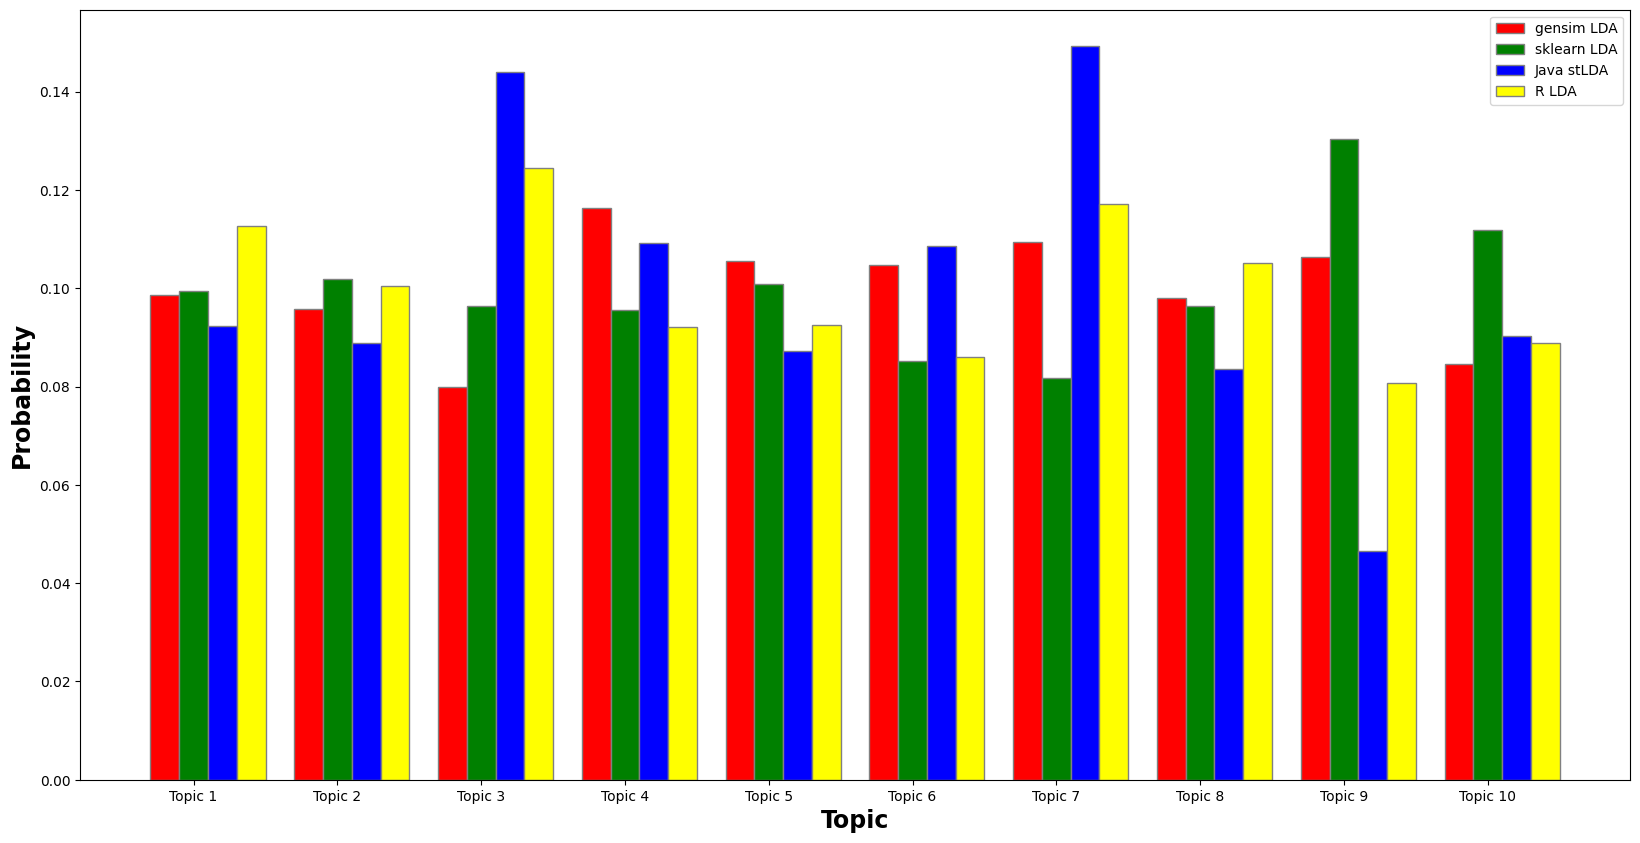

In [485]:
import matplotlib.pyplot as plt

barWidth = 0.2
fig = plt.subplots(figsize = (20,10))

br1 = np.arange(len(sklearn_distribution))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


plt.bar(br1, mean_gensim_results_final, color='r', width=barWidth, edgecolor='grey', label='gensim LDA')
plt.bar(br2, sklearn_distribution, color='g', width=barWidth, edgecolor='grey', label='sklearn LDA')
plt.bar(br3, java_model_distributions, color='b', width=barWidth, edgecolor='grey', label='Java stLDA')
plt.bar(br4, R_distribution_mean, color='yellow', width=barWidth, edgecolor='grey', label='R LDA')

plt.xlabel("Topic", fontweight='bold', fontsize=17)
plt.ylabel("Probability", fontweight='bold', fontsize=17)
plt.xticks([r + barWidth for r in range(len(sklearn_distribution))], 
           ["Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6", "Topic 7","Topic 8", "Topic 9", "Topic 10",])

plt.legend()
plt.show()

Perplexity calculation

In [514]:
# Gensim Perplexity

print(np.exp2(-lda_model_full.log_perplexity(corpus_test)))
print(np.exp2(13.1301))
# sklearn Perplexity

print(lda.bound_)

8722.126591909622
8965.07539086506
2742.242193828614


In [475]:
def plot_difference_plotly(mdiff, title="", annotation=None):
    """Plot the difference between models.

    Uses plotly as the backend."""
    import plotly.graph_objs as go
    import plotly.offline as py

    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))


def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)


try:
    get_ipython()
    import plotly.offline as py
except Exception:
    #
    # Fall back to matplotlib if we're not in a notebook, or if plotly is
    # unavailable for whatever reason.
    #
    plot_difference = plot_difference_matplotlib
else:
    py.init_notebook_mode()
    plot_difference = plot_difference_plotly

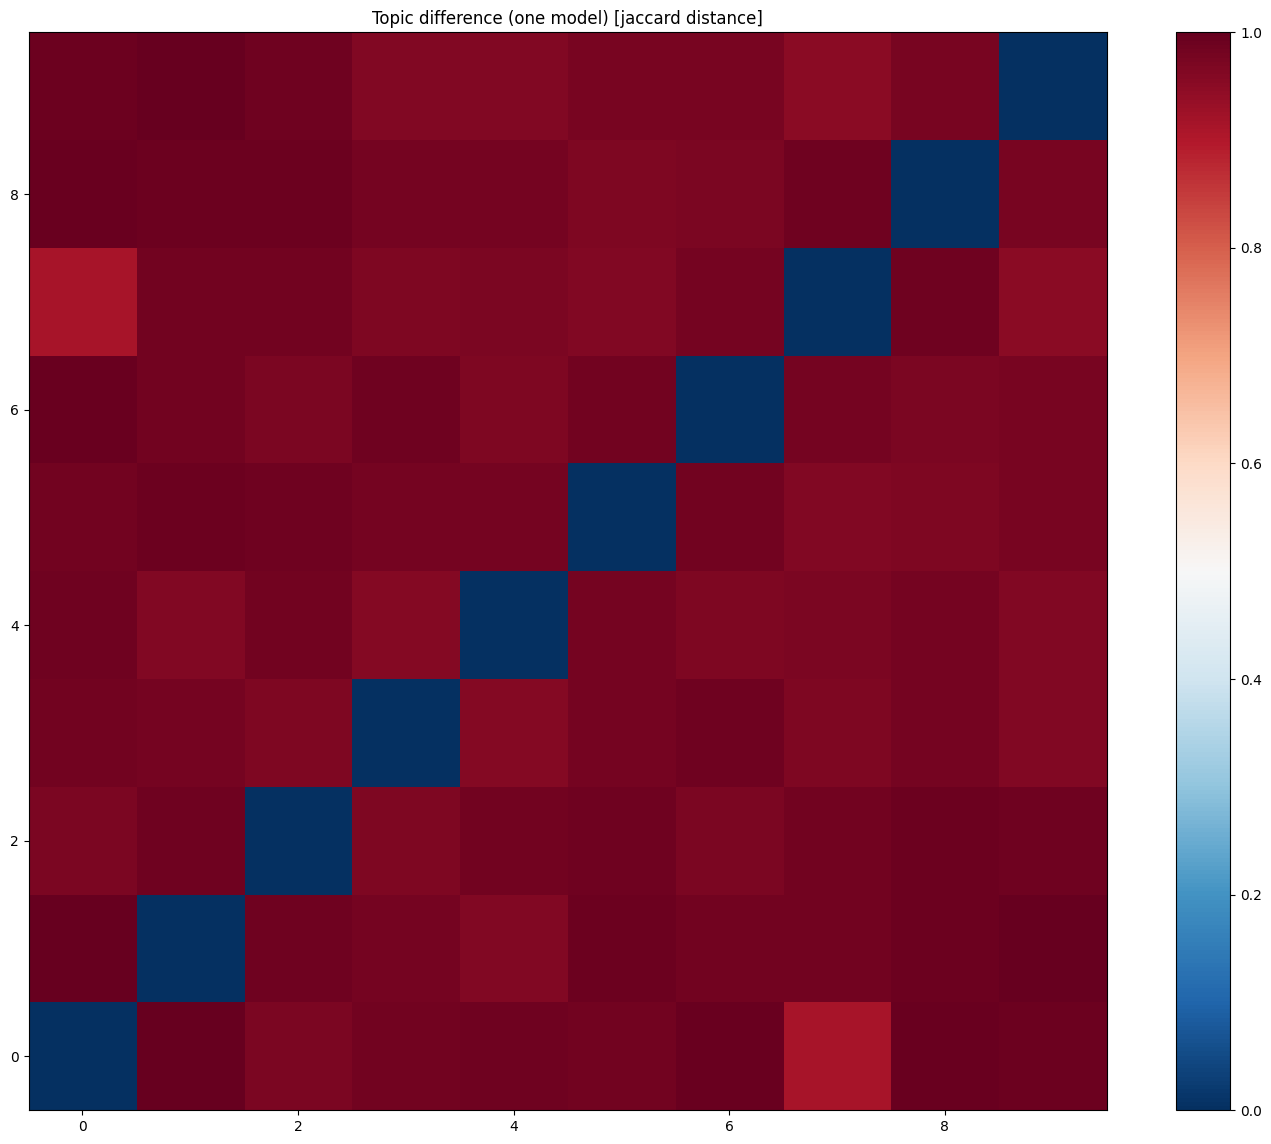

In [515]:
mdiff, annotation = lda_model_full.diff(lda_model_full, distance='hellinger', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

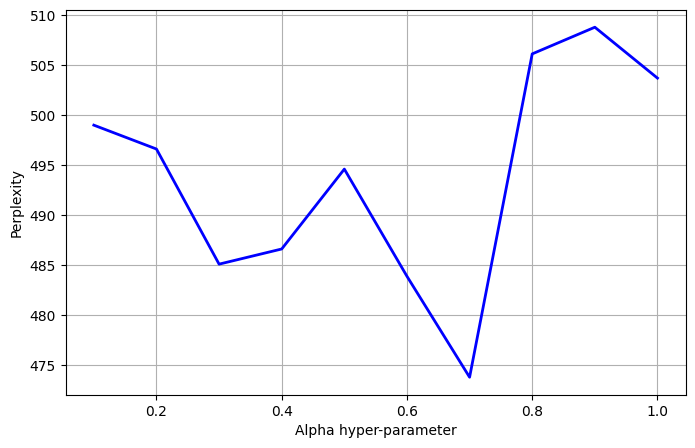

In [520]:
x = np.linspace(0.1, 1.0, 10)  # X values (from 0 to 10, 100 points)
y = [498.9732, 496.5820, 485.0571, 486.5748, 494.5725, 483.8392, 473.7349, 506.1079, 508.7778, 503.6838]  # Y values (sinusoidal data)

# Create the line plot
plt.figure(figsize=(8, 5))  # Set the figure size (optional)
plt.plot(x, y, label="Perplexity", color="blue", linestyle="-", linewidth=2)

# Add labels and title
plt.xlabel("Alpha hyper-parameter")  # Label for the x-axis
plt.ylabel("Perplexity")  # Label for the y-axis

# Add grid and legend
plt.grid(True)

# Show the plot
plt.show()

Separate Java stLDA model analysis

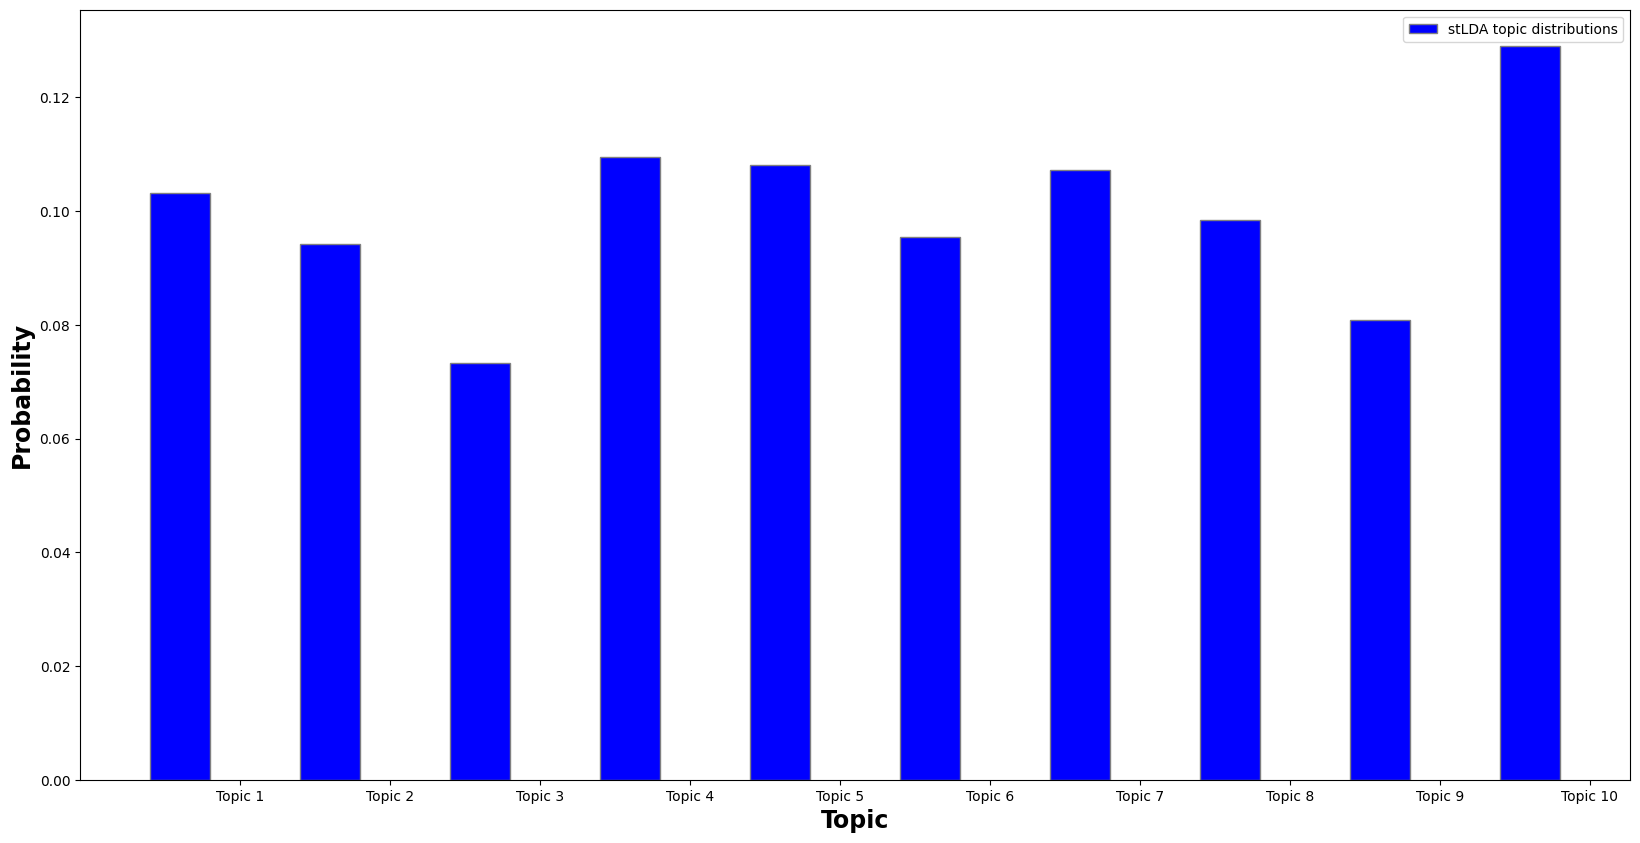

In [524]:
barWidth = 0.4
fig = plt.subplots(figsize = (20,10))

br1 = np.arange(len(java_model_distributions))


plt.bar(br1, mean_gensim_results_final, color='b', width=barWidth, edgecolor='grey', label='stLDA topic distributions')

plt.xlabel("Topic", fontweight='bold', fontsize=17)
plt.ylabel("Probability", fontweight='bold', fontsize=17)
plt.xticks([r + barWidth for r in range(len(sklearn_distribution))], 
           ["Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6", "Topic 7","Topic 8", "Topic 9", "Topic 10",])

plt.legend()
plt.show()